In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap

# Data Science

Today one of the fastest growing fields that touches all of our lives is that of data science.  Data science attempts to look at the incredible amount of data that each and every one of us produces every day on services like facebook, twitter, instagram, snap chat, or just our cell-phones.  It also is important for analyzing the world around us which is what we will experiment with today.

## Hurricanes in the Atlantic

Below we are going to play with the historical tracks of hurricanes in the Atlantic basin since 1950.  We will see how we even a modest amount of data can lead to intelligible results but if we ask the right questions, interesting answers may reveal themselves.

First off we have to load the data.  This is both the most unglorious but important part.  If we cannot gain access to the data we cannot ask any questions of it.  Our text file today is very small (~37,000 entries) but of course would be too much to for a human to read.

In [2]:
# Load data
hurricanes = {}
current_name = None
num_hurricanes = numpy.zeros(63, dtype=int)
cache = [[], [], [], [], [], [], [], [], []]

with open("hurdat.txt", 'r') as hurdat_data:
    for line in hurdat_data:
        split_data = line.split()
        year = int(split_data[0])
        month = int(split_data[1])
        day = int(split_data[2])
        hour = int(split_data[3])
        if split_data[5] == "NOT" and split_data[6] == "NAMED":
            pass
        else:
            name = split_data[5]
            lat = float(split_data[6])
            lon = float(split_data[7])
            wind_speed = float(split_data[8])
            pressure = float(split_data[9])
        
            # Categorize hurricanes (wind speed in knots)
            if wind_speed >= 64 and wind_speed < 83:
                category = 1
            elif wind_speed >= 83 and wind_speed < 96:
                category = 2
            elif wind_speed >= 96 and wind_speed < 113:
                category = 3
            elif wind_speed >= 113 and wind_speed < 135:
                category = 4
            elif wind_speed >= 135:
                category = 5
            else:
                category = 0
        
            if name != current_name:
                hurricanes[current_name] = {'year':cache[0][:], 
                                            'month':cache[1][:], 
                                            'day':cache[2][:], 
                                            'hour':cache[3][:], 
                                            'latitude':cache[4][:], 
                                            'longitude':cache[5][:], 
                                            'wind speed':cache[6][:], 
                                            'pressure':cache[7][:], 
                                            'category':cache[8][:]}
                cache = [[], [], [], [], [], [], [], [], []]
                current_name = name

                # Count huricanes
                num_hurricanes[year - 1950] +=  1

            cache[0].append(year)
            cache[1].append(month)
            cache[2].append(day)
            cache[3].append(hour)
            cache[4].append(lat)
            cache[5].append(lon)
            cache[6].append(wind_speed)
            cache[7].append(pressure)
            cache[8].append(category)
            
# Remove empty hurricanes
for name in hurricanes.keys():
    if len(hurricanes[name]['year']) == 0:
        data = hurricanes.pop(name)

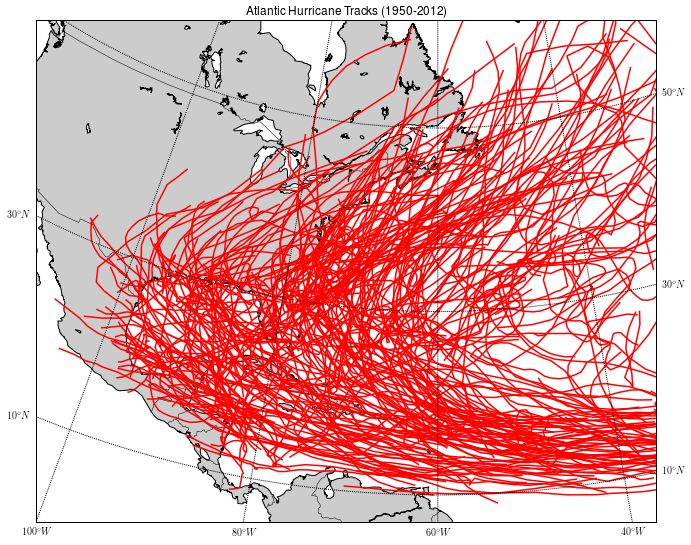

In [3]:
# Plot the data
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.iteritems():
    longitude, latitude = mapping(data['longitude'], data['latitude'])
    mapping.plot(longitude, latitude, linewidth=1.5, color='r')

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2012)')
plt.show()

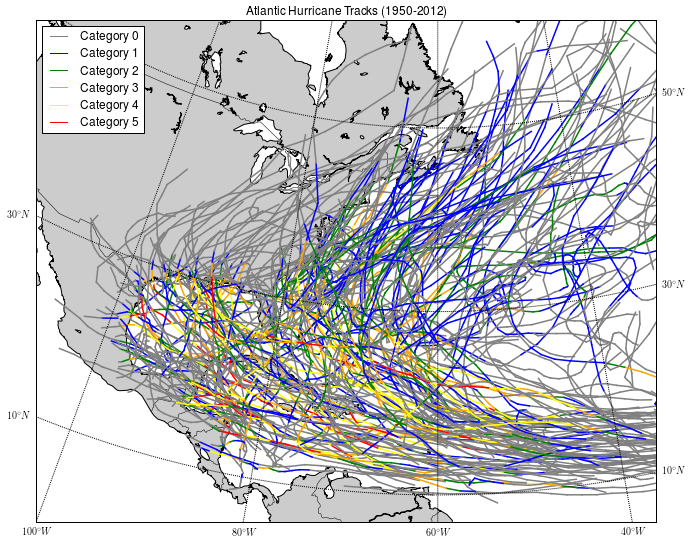

In [4]:
# Plot the data
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.iteritems():
    longitude, latitude = mapping(data['longitude'], data['latitude'])
    for i in xrange(len(longitude) - 1):
        color = category_color[data['category'][i]]
        mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2012)')
for (category, color) in category_color.iteritems():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)
plt.show()

The data is still pretty hard to discern as it looks like colorful spaghetti.  We can ask more specific questions such as 
 - Which storms happened in 2010?
 - What storms were category 3 or above?
 - Where did Hurricane Sandy go?

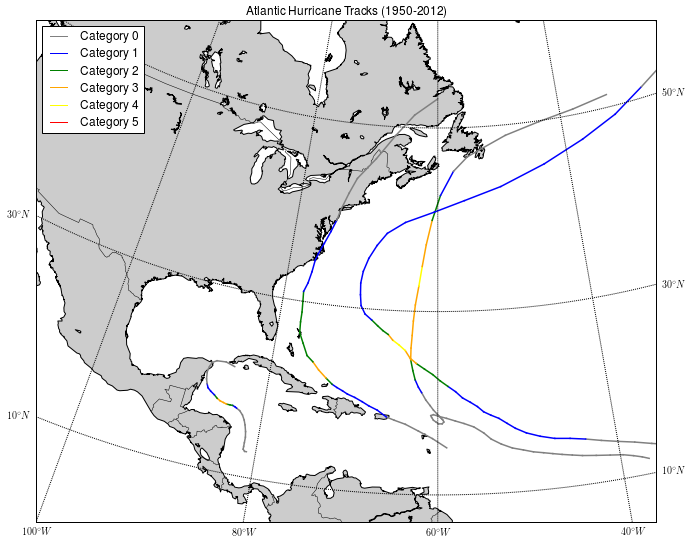

In [5]:
# Plot the data
category_color = {5:'red', 4:'yellow', 3:'orange', 2:'green', 1:'blue', 0:'gray'}
fig = plt.figure(figsize=(15,9))
axes = fig.add_subplot(1, 1, 1)
mapping = Basemap(llcrnrlon=-100.0, llcrnrlat=0.0, urcrnrlon=-20.0, urcrnrlat=57.0,
                  projection='lcc', lat_1=20.0, lat_2=40.0, lon_0=-60.0,
                  resolution ='l', area_thresh=1000.0)

for (name, data) in hurricanes.iteritems():
    if data['year'][0] == 2011 and numpy.any(numpy.array(data['category']) >= 3):
#     if name == "KATRINA":
        longitude, latitude = mapping(data['longitude'], data['latitude'])
        for i in xrange(len(longitude) - 1):
            color = category_color[data['category'][i]]
            mapping.plot(longitude[i:i+2], latitude[i:i+2], linewidth=1.5, color=color)

mapping.drawcoastlines()
mapping.drawcountries()
mapping.fillcontinents()
mapping.drawparallels(numpy.arange(10,70,20), labels=[1,1,0,0])
mapping.drawmeridians(numpy.arange(-100,0,20), labels=[0,0,0,1])
axes.set_title('Atlantic Hurricane Tracks (1950-2012)')
for (category, color) in category_color.iteritems():
    axes.plot([0], [0], color=color, label="Category %s" % category)
axes.legend(loc=2)
plt.show()

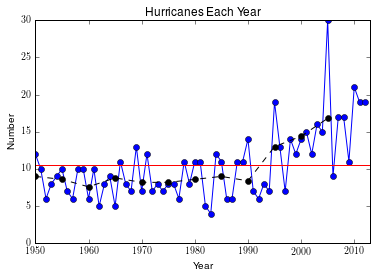

In [6]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(range(1950, 2013, 1), num_hurricanes, 'o-')
axes.plot((1950, 2013), (num_hurricanes.mean(), num_hurricanes.mean()), 'r')
# Compute rolling average
num_hurricanes_mean = numpy.zeros(12)
for i in xrange(0,60,5):
    num_hurricanes_mean[i/5] = num_hurricanes[i:i+5].mean()
axes.plot(range(1950, 2010, 5), num_hurricanes_mean, 'ko--')
axes.set_xlim((1950, 2013))
axes.set_title("Hurricanes Each Year")
axes.set_xlabel("Year")
axes.set_ylabel("Number")
plt.show()

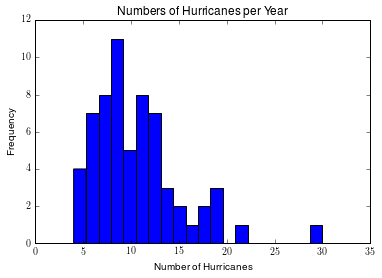

In [7]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.hist(num_hurricanes, bins=20) # Play with number of bins
axes.set_title("Numbers of Hurricanes per Year")
axes.set_xlabel("Number of Hurricanes")
axes.set_ylabel("Frequency")
plt.show()